$$loss = \frac{1}{n} \sum{|y_i - \hat{y_i}|}$$

$$loss = \frac{1}{n} \sum{|y_i - (kx_i+b_i)|}$$

$$\frac{\partial{loss}}{\partial{k}} = +或-\frac{x_i}{n}$$

$$\frac{\partial{loss}}{\partial{b}} = +或-\frac{1}{n}$$

In [33]:
import random
import numpy
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
data = load_boston()
X,y = data['data'],data['target']

In [34]:
def partial_k(x,y,y_hat):  #求 k 的导数
    n = len(y)
    
    gradient = 0
    
    for m,i,j in zip(list(x),list(y),list(y_hat)):
        if i > j:
            gradient += -m
        elif i < j:
            gradient += m
    
    return gradient / n

In [35]:
def partial_b(x,y,y_hat):  #求 b 的导数
    n = len(y)
    
    gradient = 0
    
    for i,j in zip(list(y),list(y_hat)):
        if i> j:
            gradient += -1
        elif i < j:
            gradient += 1 
    
    return gradient / n

In [36]:
rm = X[:,5]

def price(rm,k,b): #rm相当于X
    return k * rm + b

def loss(y,y_hat):
    return sum((i - j)**2 for i,j in zip(list(y),list(y_hat))) / len(list(y))

trying_times = 100000

min_loss = float('inf')

#初始化 k 和 b
current_k = random.random()*200-100
current_b = random.random()*200-100

#为避免 x + （导数的反方向）变得过大而导致loss变大，需设置一个学习率变量，赋值一个非常小的数字，类似于0.000001
learning_rate = 1e-4

for i in range(trying_times):
    
    price_k_and_b = [price(r,current_k,current_b) for  r in rm]
       
    current_loss = loss(y,price_k_and_b)
    
    if current_loss < min_loss: #得到的结果向更好的方向发展
        min_loss = current_loss
        
        if i % 5000 ==0:
            print('第{}次，best_k:{},best_b:{},and the loss is:{}'.format(i,current_k,current_b,min_loss))
        
        
    k_gradient = partial_k(rm,y,price_k_and_b)
    
    b_gradient = partial_b(rm,y,price_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate
    current_b = current_b + (-1 * b_gradient) * learning_rate
    

#换成绝对值对 k、b 进行求导，每次下降的速度（数值）很慢（很小），尝试次数足够多时且需要k、b取得较好的初始值才能得到较好的 loss。

第0次，best_k:-46.88898611996664,best_b:-74.7269024407756,and the loss is:155205.04218336145
第5000次，best_k:-43.746668926281565,best_b:-74.226902440759,and the loss is:139574.28745843083
第10000次，best_k:-40.60435173259649,best_b:-73.7269024407424,and the loss is:124773.25112936067
第15000次，best_k:-37.46203453891142,best_b:-73.22690244072581,and the loss is:110801.9331961509
第20000次，best_k:-34.319717345226344,best_b:-72.72690244070921,and the loss is:97660.33365880157
第25000次，best_k:-31.17740015154592,best_b:-72.22690244069261,and the loss is:85348.4525173298
第30000次，best_k:-28.03508295787861,best_b:-71.72690244067601,and the loss is:73866.28977176105
第35000次，best_k:-24.8927657642113,best_b:-71.22690244065942,and the loss is:63213.84542204341
第40000次，best_k:-21.75044857054399,best_b:-70.72690244064282,and the loss is:53391.11946817713
第45000次，best_k:-18.60813137687668,best_b:-70.22690244062622,and the loss is:44398.11191016199
第50000次，best_k:-15.465814183207861,best_b:-69.72690244060962,and t

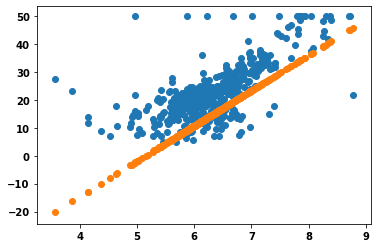

In [38]:
%matplotlib inline
k = 12.659691486755714
b = -65.24983089897411
price_k_and_b = [price(r,k,b) for  r in rm]

plt.scatter(X[:, 5], y) #实际数值
plt.scatter(rm,price_k_and_b) #预测数值

# Finish the Solution Parse Part of Edit-Distance

In [184]:
from functools import lru_cache

In [220]:
solution = {}

@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, 'Nothing needs to do')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [224]:
a = 'ASDFGkfgdsgheieieiod'
b = 'AXDCFGHJ12345ieieikd'
edit_distance(a,b)
solution

def parse_solution(string1, string2, solution):  
    solution_path = []
    
    while string1 != string2:#边界
        
        operation = solution[(string1, string2)]
        
        if operation.startswith('ADD'):
            solution_path.append((string1, operation, string2))
            string1, string2 = string1, string2[:-1]
        elif operation.startswith('DEL'):
            solution_path.append((string1, operation, string2))
            string1, string2 = string1[:-1], string2
        else:
            solution_path.append((string1, operation, string2))
            string1, string2 = string1[:-1], string2[:-1]
    
    
    return solution_path

parse_solution(a,b,solution)

[('ASDFGkfgdsgheieieiod', 'Nothing needs to do', 'AXDCFGHJ12345ieieikd'),
 ('ASDFGkfgdsgheieieio', 'SUB o => k', 'AXDCFGHJ12345ieieik'),
 ('ASDFGkfgdsgheieiei', 'Nothing needs to do', 'AXDCFGHJ12345ieiei'),
 ('ASDFGkfgdsgheieie', 'Nothing needs to do', 'AXDCFGHJ12345ieie'),
 ('ASDFGkfgdsgheiei', 'Nothing needs to do', 'AXDCFGHJ12345iei'),
 ('ASDFGkfgdsgheie', 'Nothing needs to do', 'AXDCFGHJ12345ie'),
 ('ASDFGkfgdsghei', 'Nothing needs to do', 'AXDCFGHJ12345i'),
 ('ASDFGkfgdsghe', 'DEL e', 'AXDCFGHJ12345'),
 ('ASDFGkfgdsgh', 'SUB h => 5', 'AXDCFGHJ12345'),
 ('ASDFGkfgdsg', 'SUB g => 4', 'AXDCFGHJ1234'),
 ('ASDFGkfgds', 'SUB s => 3', 'AXDCFGHJ123'),
 ('ASDFGkfgd', 'SUB d => 2', 'AXDCFGHJ12'),
 ('ASDFGkfg', 'SUB g => 1', 'AXDCFGHJ1'),
 ('ASDFGkf', 'SUB f => J', 'AXDCFGHJ'),
 ('ASDFGk', 'SUB k => H', 'AXDCFGH'),
 ('ASDFG', 'Nothing needs to do', 'AXDCFG'),
 ('ASDF', 'Nothing needs to do', 'AXDCF'),
 ('ASD', 'ADD C', 'AXDC'),
 ('ASD', 'Nothing needs to do', 'AXD'),
 ('AS', 'SUB S => X', 'A

In [225]:
edit_distance(a,b)

11

# (Optional) Finish the k-person-salesman problem:

In [1]:
import random
import math
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def geo_distance(origin, destination):#计算两个经纬度之间的距离,Haversine公式
    
    log1,lat1 = origin
    log2,lat2 = destination
    radius = 6371  # 地球平均半径 km

    dlat = math.radians(lat2 - lat1)
    dlog = math.radians(log2 - log1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlog / 2) * math.sin(dlog / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

def get_geo_distance(origin, destination):
    return geo_distance(origin,destination),destination

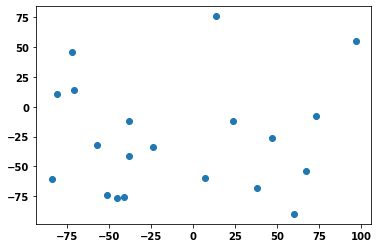

In [329]:
#随机生成20个点的经纬度
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]
plt.scatter(latitudes, longitude)

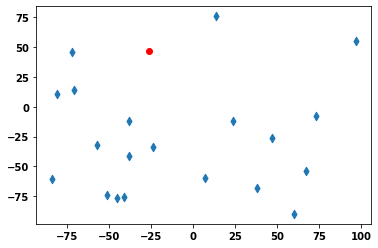

In [330]:
#将随机生成的点归集到列表cities,并创建cities_dict字典
cities_init = []
cities_dict = {}
for lat,lon in zip(list(latitudes),list(longitude)):
    cities_init.append((lon,lat))

for i,city in enumerate(cities_init):
    cities_dict[i+1] = city

#随机选择一个点为起点chosen_start
chosen_p = random.choice(cities_init)
plt.scatter(latitudes, longitude,marker='d')
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')

In [331]:

#贪心算法，局部子结构最优近似于全局最优
def tsp(start_city,v):
    distance = 0 #距离计算   
    pathes = [start_city] #记录访问过的节点的顺序
    end = start_city #最后一个访问的点为开始节点
    pathes_name = [] #节点名称列表

    while len(v) > 0: #访问的边界
        if len(v) ==1:
            v.pop(0)
            min_distance = geo_distance(start_city,end)
            distance += min_distance
            pathes.append(end)
            
        else:
            tmp = []
            v.pop(v.index(start_city)) #去掉访问过的节点
            for next_city in v:
                tmp.append(get_geo_distance(start_city,next_city))
            min_distance,visited = min(tmp,key=lambda x:x[0]) #记录当前节点到其他节点的最短距离和当前节点坐标
            distance += min_distance
            pathes.append(visited) #按顺序存入当前访问的节点
            start_city = visited #将当前节点作为起点继续循环
    
    #找到坐标名称   
    for p in pathes: 
        for i in range(1,21):
            if cities_dict[i] == p:
                pathes_name.append(str(i))
    
    print('最短路径为：' + '->'.join(pathes_name))
    return '最短距离为：' + str(distance)
    

    #运行结果
for k in range(1,21):
    if cities_dict[k] == chosen_p:
        print ('起点为：' + str(k))        
  

tsp(chosen_p,cities_init)

#由于按照经纬度计算距离，距离数值比较大

起点为：9
最短路径为：9->10->1->18->5->6->17->12->11->13->14->15->20->2->8->19->3->4->16->7->9


'最短距离为：70827.00714536672'

# 三个起点的思路是（还是贪心算法的思维）：1、除三个起点外的所有点，到哪个起点的距离最小则划分到哪个起点的区域中去；2、重复上面的做法求最短距离和路径。